# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [35]:
# Your code here
import pandas as pd

boston = pd.read_csv('../data/boston_data.csv')

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [32]:
# Your plots here
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


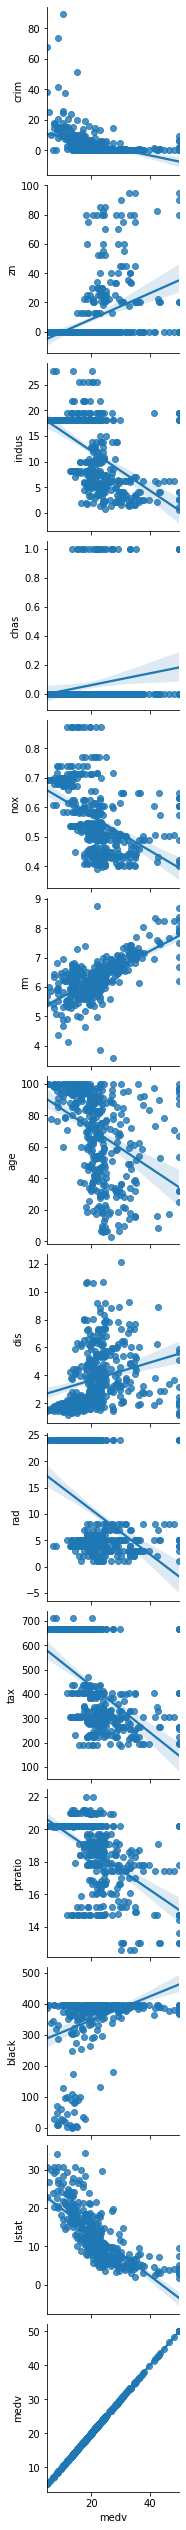

In [31]:
import seaborn as sns
sns.pairplot(data = boston, y_vars=boston.columns, x_vars='medv', kind = 'reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

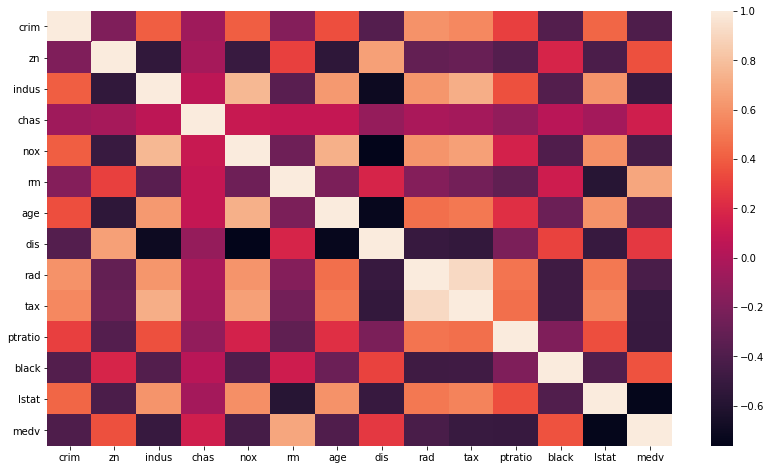

In [11]:
# Your response here

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.heatmap(boston.corr())

In [36]:
boston.drop(columns=['rad', 'ptratio', 'indus', 'nox', 'lstat', 'tax'], inplace = True)
boston.head()

,crim,zn,chas,rm,age,dis,black,medv
0,0.15876,0.0,0.0,5.961,17.5,5.2873,376.94,21.7
1,0.10328,25.0,0.0,5.927,47.2,6.9320,396.90,19.6
2,0.34940,0.0,0.0,5.972,76.7,3.1025,396.24,20.3
3,2.73397,0.0,0.0,5.597,94.9,1.5257,351.85,15.4
4,0.04337,21.0,0.0,6.115,63.0,6.8147,393.97,20.5


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [16]:
# Your code here
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [26]:
from sklearn.metrics import r2_score

def performance_metric(x, y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here
    
    y_predict = regressor.predict(x)
    
    r2 = r2_score(y_true, y_predict)
    return 

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [37]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston.drop(columns="medv")
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [72]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
depths = [2, 4, 6, 8, 10]
train_r2 = []
test_r2 = []

for d in depths:

    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=d)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    r2_train = r2_score(y_train_pred, y_train)
    train_r2.append(r2_train)
    r2_test = r2_score(y_test_pred, y_test)
    test_r2.append(r2_test)
    
    print('depth=', d, 'train r2=', r2_train)
    print('depth=', d, 'test r2=', r2_test)

depth= 2 train r2= 0.5023456744776895
depth= 2 test r2= 0.3034297534810919
depth= 4 train r2= 0.8126229078597743
depth= 4 test r2= 0.6077466246516998
depth= 6 train r2= 0.8883966698604917
depth= 6 test r2= 0.6561969983070313
depth= 8 train r2= 0.9250562907878406
depth= 8 test r2= 0.6826129557352696
depth= 10 train r2= 0.9398830157147131
depth= 10 test r2= 0.6825110481107488


Now, plot the score for each tree on the training set and on the testing set.

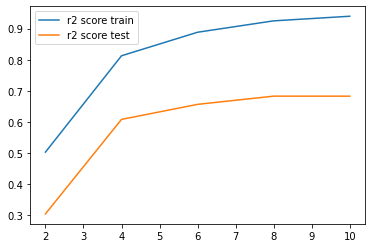

In [93]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(depths, train_r2, label='r2 score train')
plt.plot(depths, test_r2, label='r2 score test')
plt.legend()
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# the optimal depth is 4, beyond that performance improves in a lesser magnitude

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# When the model is trained with a maximum depth of 1 it has high bias 
# When the model is trained with a maximum depth of 10 it has high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# the optimal depth is 4, beyond that performance improves in a lesser magnitude

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
#The data used to develop the model is too old to apply it on current data. 
#This model could only be applicable in a city with simmilar real estate market that Boston
